In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import fsolve
from scipy.optimize import brentq
import pandas as pd
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline


#General parameters in CGS
G=6.6743e-8 #cm^3 g^-1 s^-2
c=3e10 #cm/s
m_sun=1.98855e33 #g



In [2]:
with open("rmf3eosdata.csv", "r") as file:
    contenuto = file.read()
df = pd.read_csv("rmf3eosdata.csv", sep=",", header=None, names=["density", "pressure", "energy"])


df = df.astype(float)
n = df["density"] 
p = df["pressure"]
e = df["energy"]



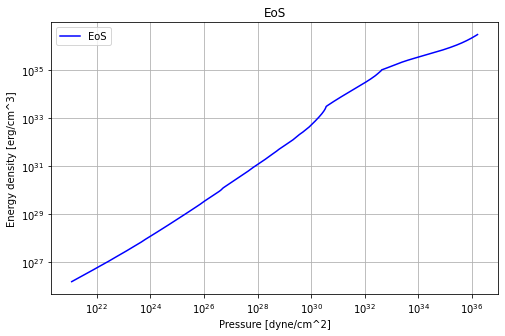

In [3]:
# Eos
plt.figure(figsize=(8, 5))
plt.plot(p, e, 'b-', label="EoS")
plt.xlabel('Pressure [dyne/cm^2]')
plt.xscale("log")
plt.yscale("log")
plt.ylabel('Energy density [erg/cm^3]')
plt.legend()
plt.title('EoS')
plt.grid()
plt.show()



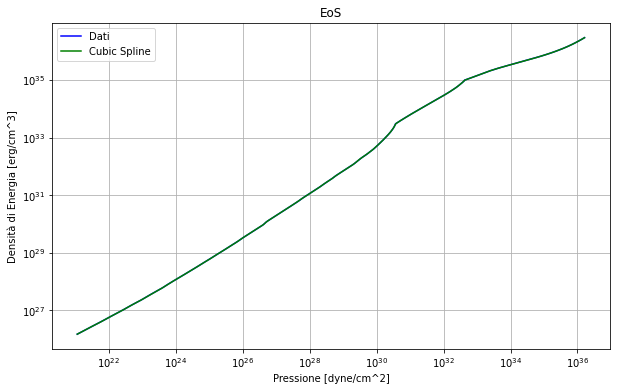

In [4]:
eos=CubicSpline(p,e)

pressure_fine = np.logspace(np.log10(min(p)),np.log10(max(p)),200)
energy_fit_cubic_spline = eos(pressure_fine)


plt.figure(figsize=(10, 6))
plt.plot(p, e, 'b-', label='Dati')
plt.plot(pressure_fine, energy_fit_cubic_spline, 'g-', label='Cubic Spline')
plt.xlabel('Pressione [dyne/cm^2]')
plt.ylabel('Densità di Energia [erg/cm^3]')
plt.xscale("log")
plt.yscale("log")
plt.title('EoS')
plt.legend()
plt.grid(True)
plt.show()




In [5]:
def tov_equations(r, y):
    p, m = y
    e=eos(p)
    dmdr = 4 * np.pi * r**2 * e / c**2
    dpdr = -G * e * m / (c**2 * r**2) * (1 + p / e) * (1 + 4 * np.pi * r**3 * p / (m * c**2)) / (1 - 2 * G * m / (c**2 * r))
    return [dpdr, dmdr]



def solve_tov(p_c):
    y0 = [p_c, 1e-6]  
    r_span = (1e-6, 5e8)

    sol = solve_ivp(tov_equations, r_span, y0, method='LSODA', max_step=1e3)

    return sol



In [6]:
#For many central pressures

#pressure in the centre of the neutron star VARYING
p_c_values = np.logspace(33.8, 36.2, 50)


# Lists to store results
M_stars = []
r_stars = []


# Solve FOR MANY POSSIBLE INTERNAL PRESSURES
for p_c in p_c_values:
 
    sol = solve_tov(p_c)
    print(f"Solving for p_c = {p_c}")  

    m_values= sol.y[1]/m_sun
    p_values= sol.y[0]
    r_values=sol.t*10**(-5)

    for i in range(len(p_values)):
        if p_values[i]<=1e21:
            r_stop = r_values[i]  # Neutron star's radius
            M_star = m_values[i]  # Neutron star's mass
            break
            
    M_stars.append(M_star)
    r_stars.append(r_stop)


M_stars = np.array(M_stars)
r_stars = np.array(r_stars)



Solving for p_c = 6.309573444801891e+33
Solving for p_c = 7.062843640984763e+33
Solving for p_c = 7.906043210907604e+33
Solving for p_c = 8.849908398088817e+33
Solving for p_c = 9.906457195491415e+33
Solving for p_c = 1.1089142367541003e+34
Solving for p_c = 1.2413022740718857e+34
Solving for p_c = 1.3894954943731247e+34
Solving for p_c = 1.5553808038632533e+34
Solving for p_c = 1.7410703775745412e+34
Solving for p_c = 1.9489285531480786e+34
Solving for p_c = 2.1816019353377597e+34
Solving for p_c = 2.442053094548635e+34
Solving for p_c = 2.7335982884848624e+34
Solving for p_c = 3.0599496872072088e+34
Solving for p_c = 3.4252626392406344e+34
Solving for p_c = 3.8341885805599e+34
Solving for p_c = 4.29193426012876e+34
Solving for p_c = 4.804328036097033e+34
Solving for p_c = 5.377894086787692e+34
Solving for p_c = 6.019935481383597e+34
Solving for p_c = 6.738627168030955e+34
Solving for p_c = 7.543120063354607e+34
Solving for p_c = 8.443657568728314e+34
Solving for p_c = 9.4517059968731

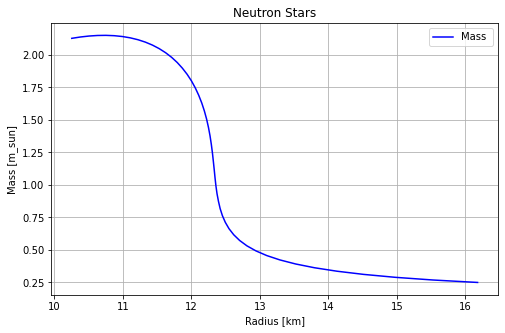

In [7]:
#Plot with R changing
plt.figure(figsize=(8, 5))
plt.plot(r_stars, M_stars,  'b-', label="Mass ")
plt.xlabel('Radius [km]')
plt.ylabel('Mass [m_sun]')
plt.legend()
plt.title('Neutron Stars')
plt.grid()
plt.show()
